In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [92]:
df = pd.read_csv("music_effect_on_mental_health.csv")
df.head()

,Age,primaryStreamingService,hoursPerDay,whileWorking,favGenre,Anxiety,Depression,Insomnia,OCD,musicEffects
0,18,Spotify,4.0,No,Video game music,7.0,7.0,10.0,2.0,noEffect
1,61,YouTube Music,2.5,Yes,Jazz,9.0,7.0,3.0,3.0,Improve
2,18,Spotify,4.0,Yes,R&B,7.0,2.0,5.0,9.0,Improve
3,18,Spotify,5.0,Yes,Jazz,8.0,8.0,7.0,7.0,Improve
4,18,YouTube Music,3.0,Yes,Video game music,4.0,8.0,6.0,0.0,Improve


In [93]:
df.shape

(724, 10)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      724 non-null    int64  
 1   primaryStreamingService  724 non-null    object 
 2   hoursPerDay              724 non-null    float64
 3   whileWorking             724 non-null    object 
 4   favGenre                 724 non-null    object 
 5   Anxiety                  724 non-null    float64
 6   Depression               724 non-null    float64
 7   Insomnia                 724 non-null    float64
 8   OCD                      724 non-null    float64
 9   musicEffects             724 non-null    object 
dtypes: float64(5), int64(1), object(4)
memory usage: 56.7+ KB


In [95]:
X = df.drop('musicEffects', axis='columns')
#from X the musicEffects column is deleted 
y = df.musicEffects #y is assigned with musicEffects feature
print(X.shape)
print(y.shape)

(724, 9)
(724,)


In [96]:
X = pd.get_dummies(X)#one hot encoding is done to categorical data into numeric data type.
X.head()

,Age,hoursPerDay,Anxiety,Depression,Insomnia,OCD,primaryStreamingService_Apple Music,primaryStreamingService_I do not use a streaming service.,primaryStreamingService_Other streaming service,primaryStreamingService_Pandora,...,favGenre_Jazz,favGenre_K pop,favGenre_Latin,favGenre_Lofi,favGenre_Metal,favGenre_Pop,favGenre_R&B,favGenre_Rap,favGenre_Rock,favGenre_Video game music
0,18,4.0,7.0,7.0,10.0,2.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,61,2.5,9.0,7.0,3.0,3.0,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,18,4.0,7.0,2.0,5.0,9.0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,18,5.0,8.0,8.0,7.0,7.0,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,18,3.0,4.0,8.0,6.0,0.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [97]:
X.corr()#figure shows the correlation between each column

,Age,hoursPerDay,Anxiety,Depression,Insomnia,OCD,primaryStreamingService_Apple Music,primaryStreamingService_I do not use a streaming service.,primaryStreamingService_Other streaming service,primaryStreamingService_Pandora,...,favGenre_Jazz,favGenre_K pop,favGenre_Latin,favGenre_Lofi,favGenre_Metal,favGenre_Pop,favGenre_R&B,favGenre_Rap,favGenre_Rock,favGenre_Video game music
Age,1.000000,-0.039667,-0.183291,-0.114478,0.006307,-0.129783,-0.019157,0.158485,0.120884,0.235995,...,0.004681,-0.109047,-0.033624,-0.029957,-0.000161,-0.067584,0.004235,-0.049670,0.139152,-0.075250
hoursPerDay,-0.039667,1.000000,0.042319,0.100133,0.134795,0.111621,0.001600,-0.059826,-0.050924,-0.054145,...,0.102805,0.016488,0.085671,0.024198,0.001765,-0.096493,-0.008267,0.101717,0.018850,-0.056199
Anxiety,-0.183291,0.042319,1.000000,0.519013,0.281557,0.342762,0.085112,-0.049592,-0.042915,-0.031093,...,0.004193,0.033912,-0.015720,0.011454,-0.009286,0.037885,-0.053428,-0.047090,0.060685,0.005081
Depression,-0.114478,0.100133,0.519013,1.000000,0.376421,0.187694,0.029704,-0.069059,-0.040575,-0.043209,...,-0.016828,-0.044357,-0.005255,0.070592,0.032942,-0.045048,-0.072682,-0.047025,0.096916,-0.027314
Insomnia,0.006307,0.134795,0.281557,0.376421,1.000000,0.223321,-0.027554,0.002348,0.025304,-0.055039,...,0.006498,-0.026380,0.013144,0.071854,0.099766,-0.050978,-0.061927,-0.083899,0.025929,0.022204
OCD,-0.129783,0.111621,0.342762,0.187694,0.223321,1.000000,0.008531,-0.032449,-0.017322,-0.047230,...,0.010036,-0.011034,-0.002436,0.032098,-0.030641,0.034170,0.008877,0.034387,0.015334,-0.021973
primaryStreamingService_Apple Music,-0.019157,0.001600,0.085112,0.029704,-0.027554,0.008531,1.000000,-0.088401,-0.073384,-0.032233,...,-0.045908,-0.016481,0.089451,0.014441,-0.017960,0.046767,0.040200,0.078725,-0.034674,-0.046483
primaryStreamingService_I do not use a streaming service.,0.158485,-0.059826,-0.049592,-0.069059,0.002348,-0.032449,-0.088401,1.000000,-0.087448,-0.038411,...,-0.054706,-0.057457,-0.017082,-0.038411,-0.005567,0.001748,-0.029291,-0.057457,0.036332,0.173389
primaryStreamingService_Other streaming service,0.120884,-0.050924,-0.042915,-0.040575,0.025304,-0.017322,-0.073384,-0.087448,1.000000,-0.031886,...,0.055236,-0.047697,-0.014181,0.015227,-0.049739,-0.040994,0.016182,0.080439,-0.006565,0.023523
primaryStreamingService_Pandora,0.235995,-0.054145,-0.031093,-0.043209,-0.055039,-0.047230,-0.032233,-0.038411,-0.031886,1.000000,...,-0.019947,-0.020950,-0.006229,-0.014006,-0.044021,-0.018669,0.083678,-0.020950,-0.015066,-0.030104


In [98]:
X_train, X_test, y_train, y_test = train_test_split( X, y,test_size=0.2, stratify=y, random_state=2) 
#data set is split into training and testing data set.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(579, 30)
(579,)
(145, 30)
(145,)


In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [100]:
training_accuracy=[]
test_accuracy=[]
validation_accuracy=[]
for k in range(1,30) :
# build the model
  clf = KNeighborsClassifier(n_neighbors=k) 
  clf.fit(X_train_scaled, y_train)
  training_accuracy.append(clf.score(X_train_scaled, y_train)) 
  scores = cross_val_score(clf, X_train_scaled, y_train, cv=10)
    
  print("k: ",k, "val acc:", scores.mean())
  validation_accuracy.append(scores.mean())
  test_accuracy.append(clf.score(X_test_scaled, y_test))

k:  1 val acc: 0.6476709013914096
k:  2 val acc: 0.7236539624924381
k:  3 val acc: 0.689080459770115
k:  4 val acc: 0.7340290381125227
k:  5 val acc: 0.7271022383545069
k:  6 val acc: 0.7288263762855414
k:  7 val acc: 0.7340290381125227
k:  8 val acc: 0.7374773139745916
k:  9 val acc: 0.7288263762855415
k:  10 val acc: 0.730550514216576
k:  11 val acc: 0.7253781004234725
k:  12 val acc: 0.7271022383545069
k:  13 val acc: 0.730550514216576
k:  14 val acc: 0.733998790078645
k:  15 val acc: 0.730550514216576
k:  16 val acc: 0.733998790078645
k:  17 val acc: 0.7323049001814883
k:  18 val acc: 0.733998790078645
k:  19 val acc: 0.7322746521476104
k:  20 val acc: 0.737447065940714
k:  21 val acc: 0.737447065940714
k:  22 val acc: 0.7392014519056261
k:  23 val acc: 0.7392014519056261
k:  24 val acc: 0.7392014519056261
k:  25 val acc: 0.7392014519056261
k:  26 val acc: 0.7409255898366607
k:  27 val acc: 0.7426497277676951
k:  28 val acc: 0.7426497277676951
k:  29 val acc: 0.7444041137326074


In [101]:
clf = KNeighborsClassifier(n_neighbors=26)
clf.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=26)

In [102]:
scores = cross_val_score(clf, X_train_scaled, y_train, cv=10)
print(scores)

[0.75862069 0.74137931 0.74137931 0.74137931 0.75862069 0.74137931
 0.74137931 0.72413793 0.72413793 0.73684211]


In [103]:
print("training accuracy:", clf.score(X_train_scaled,y_train))
print("testing accuracy:", clf.score(X_test_scaled,y_test))

training accuracy: 0.7409326424870466
testing accuracy: 0.7448275862068966


In [104]:
yPredict = clf.predict(X_test_scaled)
cm = confusion_matrix(y_test, yPredict)
tn = cm.ravel()
print(cm)
print(tn)

[[108   0   0]
 [  3   0   0]
 [ 34   0   0]]
[108   0   0   3   0   0  34   0   0]


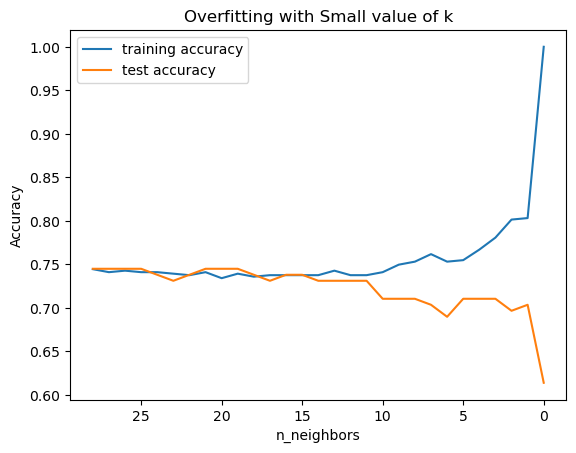

In [105]:
plt.plot(training_accuracy, label="training accuracy") 
plt.plot(test_accuracy, label="test accuracy") 
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.title('Overfitting with Small value of k') 
ax = plt.gca()
ax.invert_xaxis() 
plt.savefig('plots/KNN_overfitting.png')